In [1]:
import tensorflow as tf
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

import time
import re
import os
import io

from collections import Counter

***

# 데이터 불러오기 및 확인

In [2]:
path_ko = os.getenv('HOME')+"/aiffel/nlp8/korean-english/korean-english-park.train.ko"
path_en = os.getenv('HOME')+"/aiffel/nlp8/korean-english/korean-english-park.train.en"

In [3]:
with open(path_ko, "r") as f:
    raw_ko = f.read().splitlines()

print("Data Size:", len(raw_ko))
print("Example:")

for sen in raw_ko[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


In [4]:
with open(path_en, "r") as f:
    raw_en = f.read().splitlines()

print("Data Size:", len(raw_en))
print("Example:")

for sen in raw_en[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> Much of personal computing is about "can you top this?"
>> Amid mounting pressure on North Korea to abandon its nuclear weapons program Japanese and North Korean diplomats have resumed talks on normalizing diplomatic relations.
>> “Guard robots are used privately and professionally to detect intruders or fire,” Karlsson said.
>> Authorities from the Water Resources Ministry plan to begin construction next year on the controversial and hugely expensive project.
>> Researchers also have debated whether weight-training has a big impact on the heart, since it does not give the heart and lungs the kind of workout they get from aerobic activities such as brisk walking or running for at least 20 minutes.


***

# 중복 데이터 삭제

In [5]:
raw_ko_new1 = []
raw_en_new1 = []
for i in range(len(raw_ko)):
    if raw_ko[i] not in raw_ko_new1:
        raw_ko_new1.append(raw_ko[i])
        raw_en_new1.append(raw_en[i])
        
raw_ko_new2 = []
raw_en_new2 = []
for j in range(len(raw_en_new1)):
    if raw_en_new1[j] not in raw_en_new2:
        raw_ko_new2.append(raw_ko_new1[j])
        raw_en_new2.append(raw_en_new1[j])

## set을 사용하지 않고 위와 같은 방식으로 중복 제거를 한 이유

set을 사용하여 중복 제거를 한다면 훨씬 간편하고 빠르게 중복 제거가 가능하다.  
하지만 단순히 set을 사용하게 될 경우에는 몇 가지 문제가 발생한다.  
  
만약 한글과 영어 각각에 대해 set을 사용할 경우 각각 한글과 영어 리스트에서 중복인 데이터가 삭제 되고 집합의 특성으로 순서쌍이 틀어지게된다.  
또한 각 데이터에 set을 사용한 후 데이터 사이즈를 검사했을 때 두 데이터의 사이즈가 달랐다.  
이는 두 데이터에 중복된 데이터가 서로 다르다는 뜻이다.  
만약 한글과 영어 데이터를 합친 후에 set을 사용하게 될 경우 두 데이터에 같은 쌍으로 중복된 데이터만이 삭제 된다.  
따라서 한글에 대해서든 영어에 대해서든 중복된 데이터 쌍을 모두 삭제하여야 한다.  
하지만 이를 set으로 구현할 방도가 마땅히 떠오르지 않아 연산이 많아지지만 데이터가 무지막지하게 크지 않은 만큼 for문을 사용하여 중복 제거를 실시하였다.  

In [6]:
print("Data Size:", len(raw_ko_new2))
print("Example:")

for sen in raw_ko_new2[0:100][::20]: print(">>", sen)

Data Size: 74849
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> 라고 Karlsson이 말했다. "국방성은 그러한 로보트를 여러 대 갖고 있으며, 그 로보트들은 미국과 유럽의 핵 발전소에서 사용되고 있지만, 시장은 아직도 한계를 벗어나지 못하고 있습니다."
>> 장쟈오 수자원부 차관은 사업 승인을 받기 위해 금년말까지 이 사업 계획이 의회에 제출될 것이라고 말했다.
>> 그러나 이번 하버드 공중 위생 학교의 연구에서는, 일주일에 30분이나 그 이상 근력 운동을 한 남성들이 아령으로 운동하지 않는 남성들보다 심장병에 걸릴 위험이 23% 낮았다.


In [7]:
print("Data Size:", len(raw_en_new2))
print("Example:")

for sen in raw_en_new2[0:100][::20]: print(">>", sen)

Data Size: 74849
Example:
>> Much of personal computing is about "can you top this?"
>> Amid mounting pressure on North Korea to abandon its nuclear weapons program Japanese and North Korean diplomats have resumed talks on normalizing diplomatic relations.
>> “The Pentagon have several, and they are used in nuclear plants in the United States and Europe, but the market is still rather marginal."
>> Vice Minister of the Water Resources ministry Zhang Jiyao said plans for the project would be submitted for approval to the cabinet by the end of the year.
>> But in the Harvard School of Public Health study, men who engaged in weight training for 30 minutes or more weekly had a 23 percent lower risk of heart disease than men who did not pump iron.


## 중복 제거후 한글과 영어 데이터 모두 같은 사이즈이고 순서가 바뀌지 않고 데이터 쌍이 유지 되고 있음을 확인

***

# 데이터 전처리
영어 데이터에 start와 end를 넣어준다.  
또한 한글과 영어 데이터 각각에 대해 길이 40 이하의 데이터만 추출하여 새로운 리스트로 저장한다.  
한글과 영어 모두에 대해서 길이 제한을 적용하지 않고 한쪽 데이터에 대해서만 길이 제한을 한다면 한쪽에서는 40이하이더라도 다른 한쪽에서는 40을 초과하는 데이터 쌍(심할 경우 100 초과)이 남게되면서 패딩이 과도하게 많이 되어 학습 성능이 떨어질 수 있다.

In [8]:
from konlpy.tag import Mecab
mecab = Mecab()

In [19]:
def preprocess(raw_ko_new2, raw_en_new2):
    enc_corpus_temp1 = []
    dec_corpus_temp1 = []
    enc_corpus_temp2 = []
    dec_corpus_temp2 = []
    enc_corpus = []
    dec_corpus = []
    
    for ko in raw_ko_new2:
        ko = re.sub(r"([?.!,])", r" \1 ", ko)
        ko = re.sub(r'[" "]+', " ", ko)
        ko = re.sub(r"[^ㄱ-ㅎ가-힣0-9?.!,]+", " ", ko)
        ko_list = mecab.morphs(ko)
        enc_corpus_temp1.append(ko_list)
        
    for en in raw_en_new2:
        en = en.lower().strip()
        en = re.sub(r"([?.!,])", r" \1 ", en)
        en = re.sub(r'[" "]+', " ", en)
        en = re.sub(r"[^a-zA-Z0-9?.!,]+", " ", en)
        en = en.strip()
        en = '<start> ' + en
        en = en + ' <end>'
        en = en.strip()
        en_list = en.split()
        dec_corpus_temp1.append(en_list)
        
    for i in range(len(dec_corpus_temp1)):
        if len(dec_corpus_temp1[i])<=40:
            enc_corpus_temp2.append(enc_corpus_temp1[i])
            dec_corpus_temp2.append(dec_corpus_temp1[i])
            
    for i in range(len(enc_corpus_temp2)):
        if len(enc_corpus_temp2[i])<=40:
            enc_corpus.append(enc_corpus_temp2[i])
            dec_corpus.append(dec_corpus_temp2[i])
            
    return enc_corpus, dec_corpus

In [20]:
enc_corpus, dec_corpus = preprocess(raw_ko_new2, raw_en_new2)

In [21]:
print("Korean:", enc_corpus[100])
print("English:", dec_corpus[100])

Korean: ['윌리암즈', '는', '샌', '틴', '교도소', '의', '작', '은', '독방', '에서', '아이', '들', '이', '자신', '과', '똑같', '은', '실수', '를', '저지르', '지', '않', '도록', '하', '는', '운동', '을', '주도', '하', '고', '있', '다', '.']
English: ['<start>', 'from', 'his', 'tiny', 'san', 'quentin', 'cell', ',', 'williams', 'leads', 'a', 'campaign', 'to', 'stop', 'children', 'from', 'making', 'the', 'same', 'mistakes', 'he', 'did', '.', '<end>']


In [22]:
print(len(enc_corpus), len(dec_corpus))

57855 57855


***

# 토큰화

In [23]:
maxlen = 40
def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='', num_words=20000)
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post', maxlen = maxlen)

    return tensor, tokenizer

In [25]:
enc_tensor, enc_tokenizer = tokenize(enc_corpus)
dec_tensor, dec_tokenizer = tokenize(dec_corpus)

enc_train, enc_val, dec_train, dec_val = train_test_split(enc_tensor, dec_tensor, test_size=0.2)

print("Korean Vocab Size:", len(enc_tokenizer.index_word))
print("English Vocab Size:", len(dec_tokenizer.index_word))

Korean Vocab Size: 37616
English Vocab Size: 39290


***

# 모델 생성

In [26]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.w_dec = tf.keras.layers.Dense(units)
        self.w_enc = tf.keras.layers.Dense(units)
        self.w_com = tf.keras.layers.Dense(1)
    
    def call(self, h_enc, h_dec):

        h_enc = self.w_enc(h_enc)
        h_dec = tf.expand_dims(h_dec, 1)
        h_dec = self.w_dec(h_dec)

        score = self.w_com(tf.nn.tanh(h_dec + h_enc))
        
        attn = tf.nn.softmax(score, axis=1)

        context_vec = attn * h_enc
        context_vec = tf.reduce_sum(context_vec, axis=1)

        return context_vec, attn

In [27]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units):
        super(Encoder, self).__init__()
        
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(enc_units, return_sequences = True)

    def call(self, x):
        out = self.embedding(x)
        out = self.gru(out)
        
        return out

In [28]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units):
        super(Decoder, self).__init__()
        
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(dec_units, return_sequences = True, return_state = True)
        self.fc = tf.keras.layers.Dense(vocab_size)
        self.attention = BahdanauAttention(self.dec_units)

    def call(self, x, h_dec, enc_out):
        context_vec, attn = self.attention(enc_out, h_dec)
        out = self.embedding(x)
        out = tf.concat([tf.expand_dims(context_vec, 1), out], axis=-1)
        out, h_dec = self.gru(out)
        out = tf.reshape(out, (-1, out.shape[2]))
        out = self.fc(out)
        
        return out, h_dec, attn

In [29]:
BATCH_SIZE     = 64
SRC_VOCAB_SIZE = len(enc_tokenizer.index_word) + 1
TGT_VOCAB_SIZE = len(dec_tokenizer.index_word) + 1

units         = 1024
embedding_dim = 512

encoder = Encoder(SRC_VOCAB_SIZE, embedding_dim, units)
decoder = Decoder(TGT_VOCAB_SIZE, embedding_dim, units)

sequence_len = 40

sample_enc = tf.random.uniform((BATCH_SIZE, sequence_len))
sample_output = encoder(sample_enc)

print ('Encoder Output:', sample_output.shape)

sample_state = tf.random.uniform((BATCH_SIZE, units))

sample_logits, h_dec, attn = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                     sample_state, sample_output)

print ('Decoder Output:', sample_logits.shape)
print ('Decoder Hidden State:', h_dec.shape)
print ('Attention:', attn.shape)

Encoder Output: (64, 40, 1024)
Decoder Output: (64, 39291)
Decoder Hidden State: (64, 1024)
Attention: (64, 40, 1)


In [30]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss = loss_object(real, pred)
    
    mask = tf.cast(mask, dtype=loss.dtype)
    loss *= mask
    
    return tf.reduce_mean(loss)

In [31]:
@tf.function
def train_step(src, tgt, encoder, decoder, optimizer, dec_tok):
    bsz = src.shape[0]
    loss = 0

    with tf.GradientTape() as tape:
        enc_out = encoder(src)
        h_dec = enc_out[:, -1]
        
        dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * bsz, 1)

        for t in range(1, tgt.shape[1]):
            pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)

            loss += loss_function(tgt[:, t], pred)
            dec_src = tf.expand_dims(tgt[:, t], 1)
        
    batch_loss = (loss / int(tgt.shape[1]))

    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    
    return batch_loss

***

# 학습

In [33]:
from tqdm import tqdm
import random

EPOCHS = 10

for epoch in range(EPOCHS):
    total_loss = 0
    
    idx_list = list(range(0, enc_tensor.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)

    for (batch, idx) in enumerate(t):
        batch_loss = train_step(enc_tensor[idx:idx+BATCH_SIZE],
                                dec_tensor[idx:idx+BATCH_SIZE],
                                encoder,
                                decoder,
                                optimizer,
                                dec_tokenizer)
    
        total_loss += batch_loss
        
        t.set_description_str('Epoch %2d' % (epoch + 1))
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))

Epoch 10: 100%|██████████| 904/904 [24:38<00:00,  1.64s/it, Loss 1.3382]


***

# 번역기 생성 및 시각화

In [58]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

In [59]:
def preprocess_sentence(sentence):

    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)   
    sentence = re.sub(r"[^ㄱ-ㅎ가-힣0-9.,?!]+", " ", sentence)
    result = mecab.morphs(sentence)

    return result

In [60]:
def evaluate(sentence, encoder, decoder):
    attention = np.zeros((dec_tensor.shape[-1], enc_tensor.shape[-1]))
    
    sentence = preprocess_sentence(sentence)
    inputs = enc_tokenizer.texts_to_sequences([sentence])
    inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs, maxlen=enc_tensor.shape[-1], padding='post')

    result = ''

    enc_out = encoder(inputs)

    dec_hidden = enc_out[:, -1]
    dec_input = tf.expand_dims([dec_tokenizer.word_index['<start>']], 0)

    for t in range(dec_tensor.shape[-1]):
        predictions, dec_hidden, attention_weights = decoder(dec_input, dec_hidden, enc_out)

        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention[t] = attention_weights.numpy()

        predicted_id = tf.argmax(tf.math.softmax(predictions, axis=-1)[0]).numpy()

        result += dec_tokenizer.index_word[predicted_id] + ' '

        if dec_tokenizer.index_word[predicted_id] == '<end>':
            return result, sentence, attention

        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention


def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


def translate(sentence, encoder, decoder):
    result, sentence, attention = evaluate(sentence, encoder, decoder)

    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))
    
    attention = attention[:len(result), :len(sentence)]
    plot_attention(attention, sentence, result.split(' '))

Input: ['향후', '주식', '시장', '전망', '은', '좋', '지', '않', '아', '보인다', '.']
Predicted translation: the stock markets remain dismal . <end> 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator


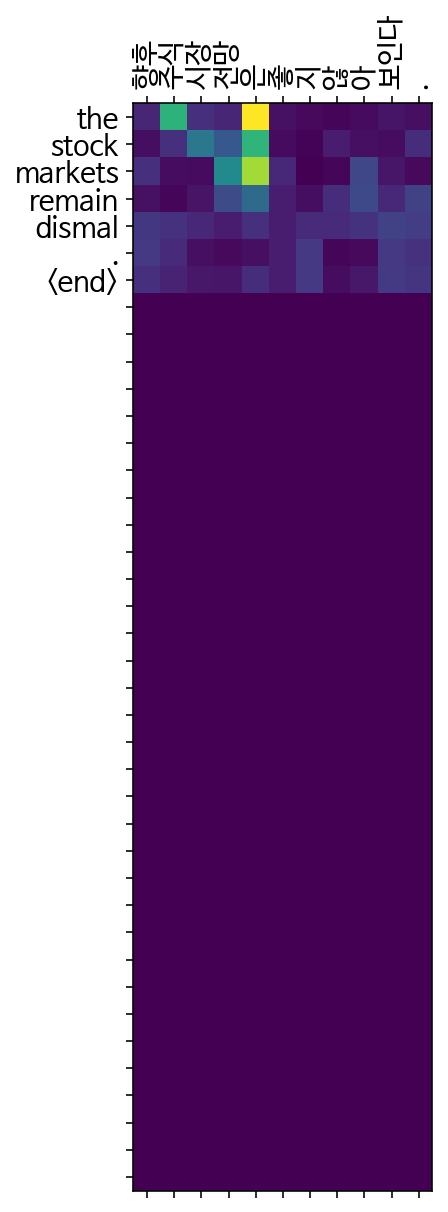

In [73]:
translate("향후 주식 시장 전망은 좋지 않아 보인다.", encoder, decoder)

Input: ['어떻게', '살', '아야', '행복', '할', '수', '있', '을까요', '?']
Predicted translation: how do you ? <end> 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator


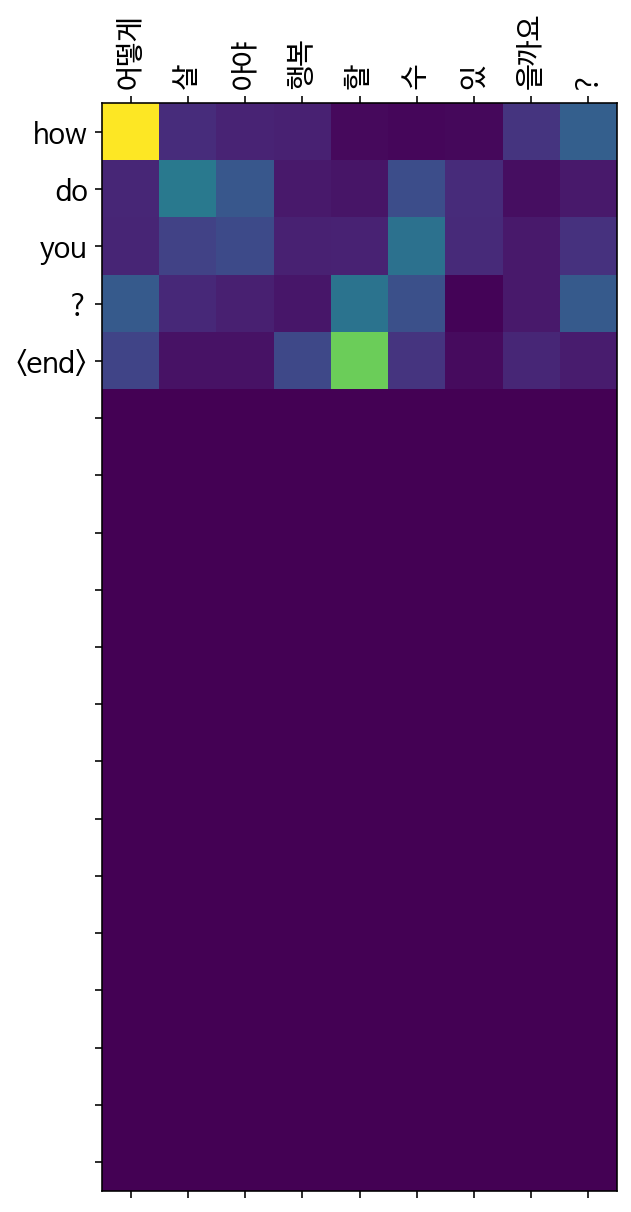

In [87]:
translate("어떻게 살아야 행복할 수 있을까요?", encoder, decoder)

Input: ['기술', '의', '발전', '은', '국가', '의', '성장', '동력', '이', '다', '.']
Predicted translation: technology is a natural power . <end> 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator


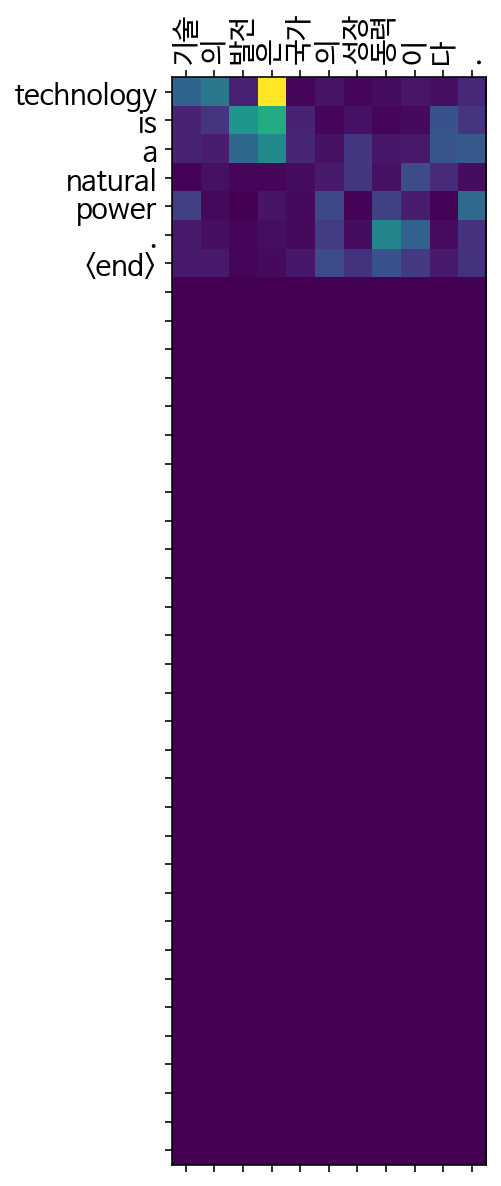

In [88]:
translate("기술의 발전은 국가의 성장동력이다.", encoder, decoder)

Input: ['규칙', '적', '인', '운동', '은', '건강', '에', '반드시', '필요', '하', '다', '.']
Predicted translation: the result is a good health . <end> 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator


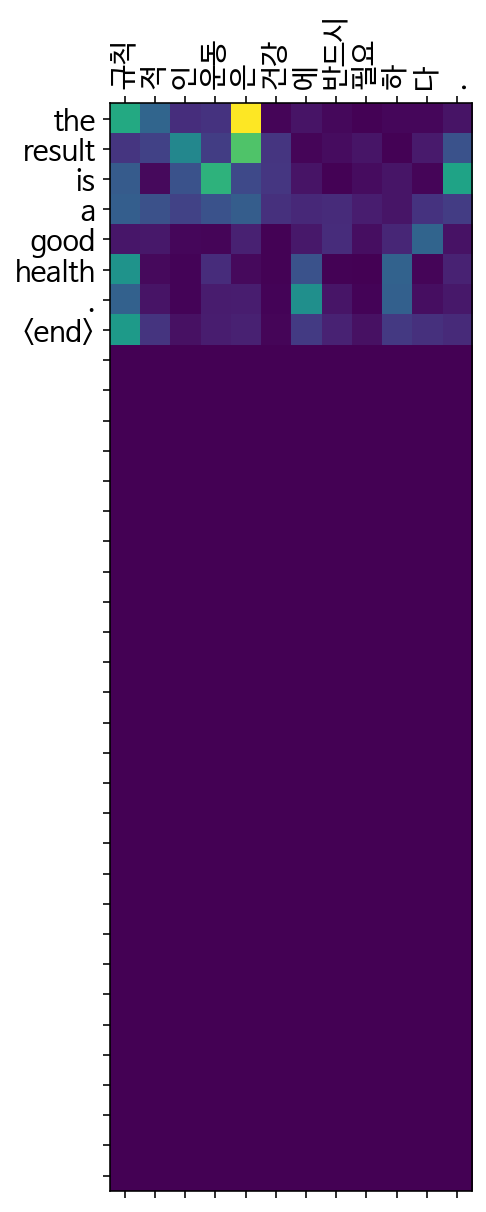

In [89]:
translate("규칙적인 운동은 건강에 반드시 필요하다.", encoder, decoder)

Input: ['최신', '제품', '은', '항상', '비싸', '다', '.']
Predicted translation: it s a big bang <end> 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator


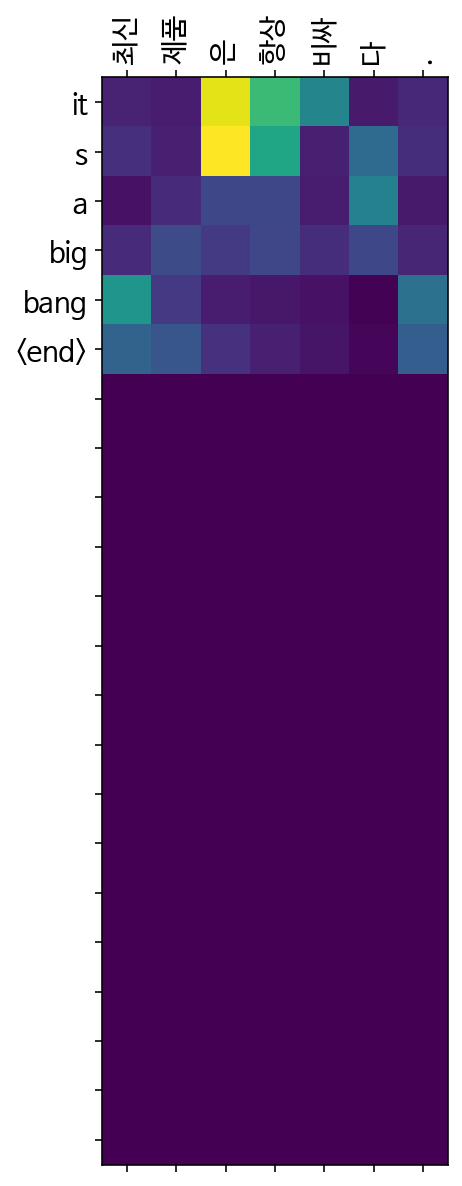

In [100]:
translate("최신 제품은 항상 비싸다.", encoder, decoder)

Input: ['물가', '상승', '이', '금리', '인상', '을', '부추긴다', '.']
Predicted translation: prices are also a burden on the interest rate . <end> 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator


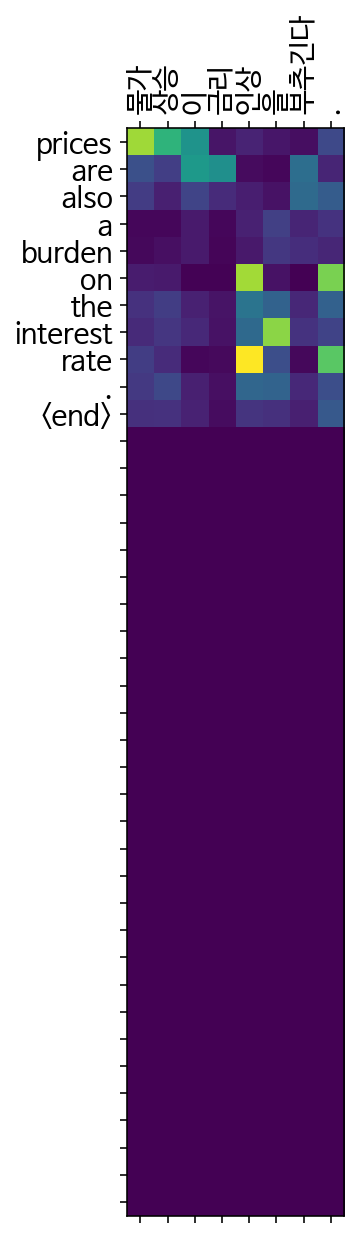

In [96]:
translate("물가 상승이 금리 인상을 부추긴다.", encoder, decoder)

Input: ['모든', '사람', '마다', '영혼', '을', '울리', '는', '음식', '이', '있', '다', '.']
Predicted translation: all the people are more accustomed to the merchant of the food . <end> 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator


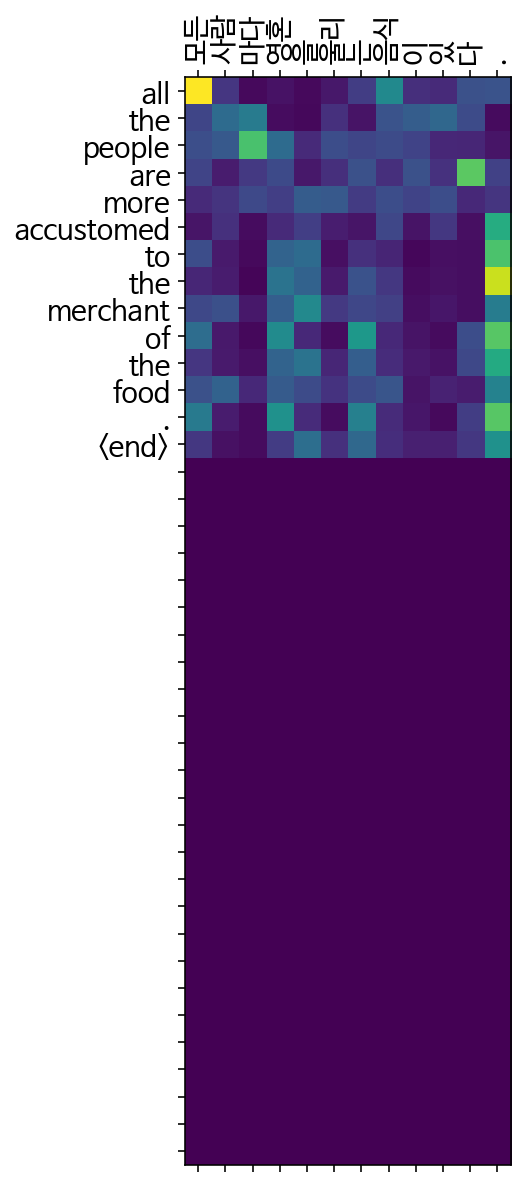

In [101]:
translate("모든 사람마다 영혼을 울리는 음식이 있다.", encoder, decoder)

Input: ['잘', '지내', '냐고', '너', '에게', '말', '할', '수', '있', '을까', '?']
Predicted translation: what do you do ? <end> 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator


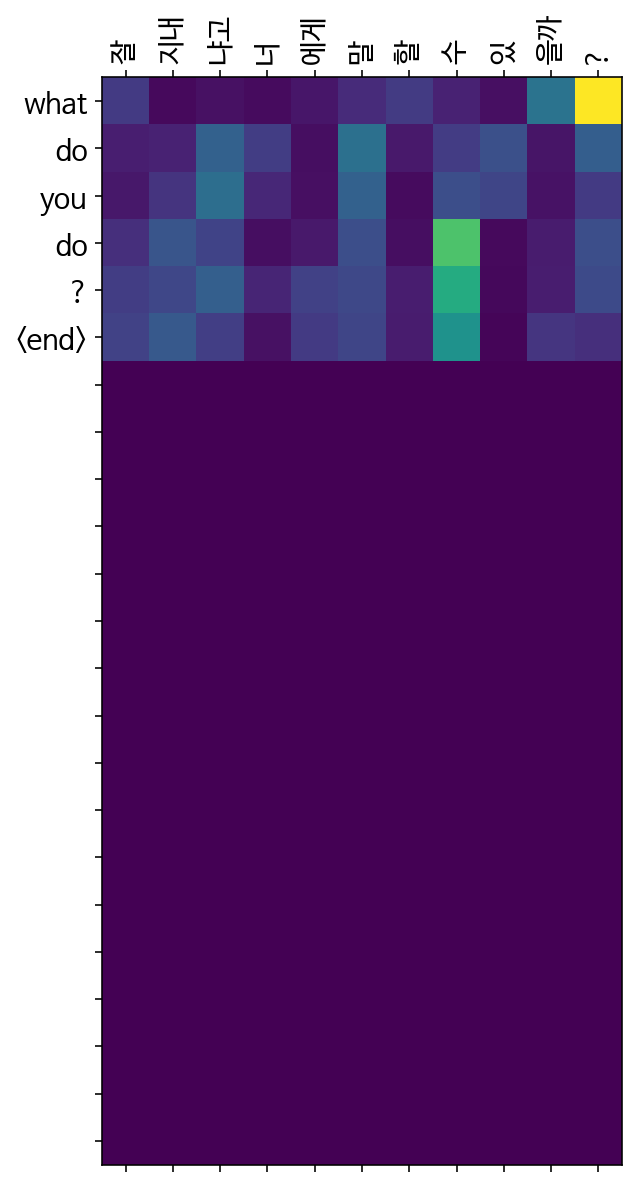

In [102]:
translate("잘 지내냐고 너에게 말 할 수 있을까?", encoder, decoder)

Input: ['그녀', '는', '새로운', '출발', '을', '위해', '미국', '으로', '떠났', '다', '.']
Predicted translation: she had been in the united states . <end> 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator


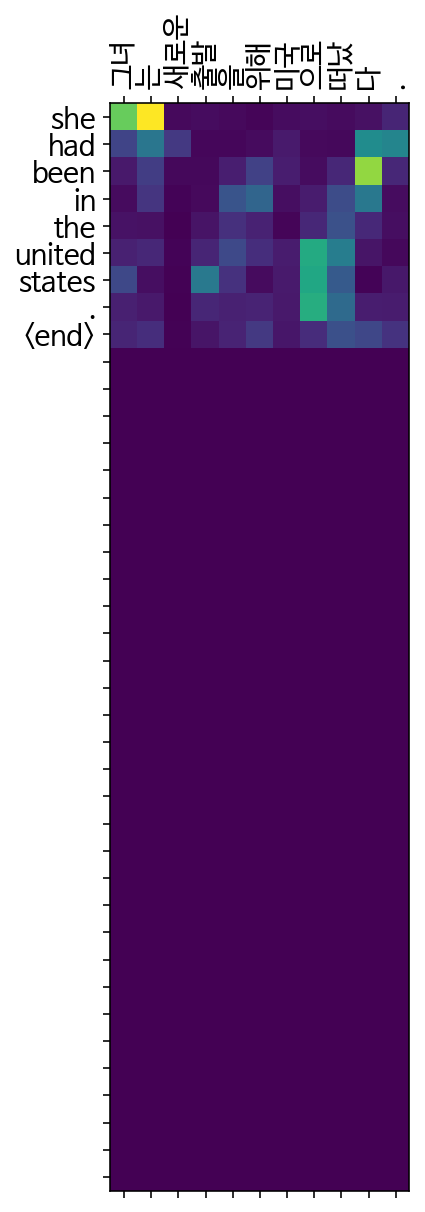

In [108]:
translate("그녀는 새로운 출발을 위해 미국으로 떠났다.", encoder, decoder)

Input: ['사람', '이', '숫자', '가', '될', '때', '전쟁', '은', '야만', '이', '된다', '.']
Predicted translation: the war is a sin . <end> 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator


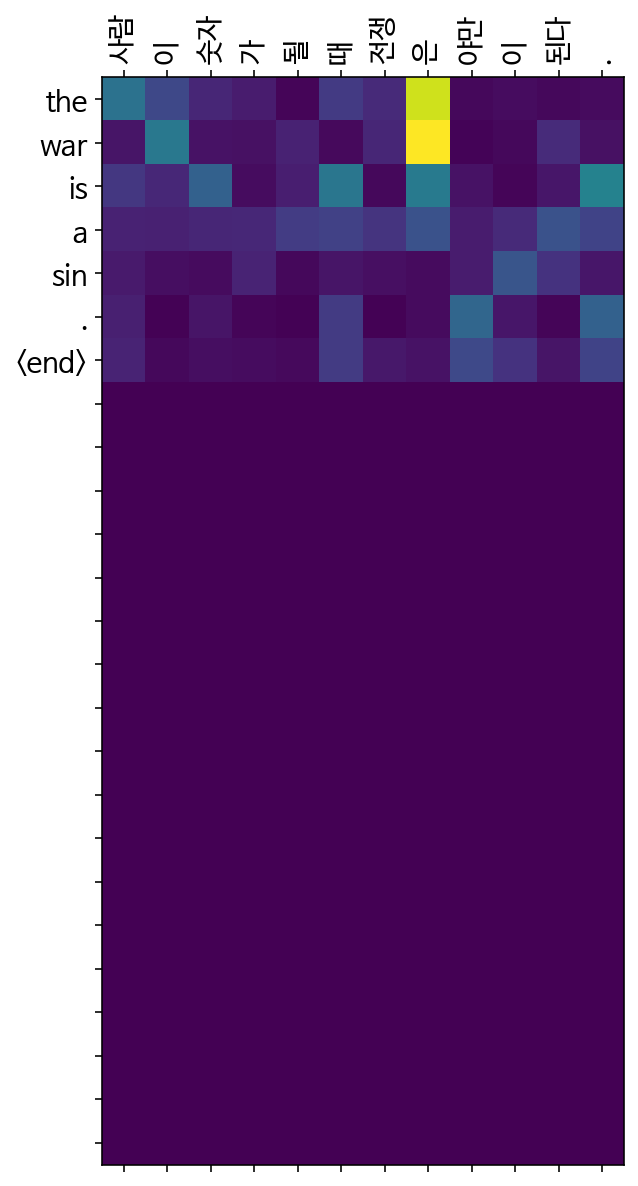

In [70]:
translate("사람이 숫자가 될 때 전쟁은 야만이 된다.", encoder, decoder)

***

# 고찰

다양한 문장에 대해 번역기를 사용해 보았습니다.  
하지만 학습된 단어가 아니면 성능이 매우 떨어지는 느낌이 났습니다.  
데이터셋에 있을 법한 단어를 사용할 경우 그나마 번역이 시도라도 되어 있는 것 처럼 보이지만, 조금만 어렵거나 복잡한 문장을 입력거나 데이터셋에 없을 법한 고유 명사가 입력되면 결과물조차 제대로 출력되지 않았습니다.    
데이터셋에 있을 법한 단어를 골라 사용했더라도 정확하게 매치를 하지 못 했습니다.  
아무래도 학습 과정에서 어텐션 레이어를 사용했지만 트랜스포머처럼 어텐션의 효과를 백분 활용한게 아니어서 그런지 기대한 만큼의 성능이 나오지 않는 듯 합니다.  
거기에다가 한글과 영어는 문법적으로도 차이가 커서 성능 저하가 더 심하게 나타난 것으로 생각됩니다.  
또한 영어로 번역되지 못 하는 형태소들이 많은 것도 성능 저하에 영향을 주지 않았나 싶습니다.  
일단 앞으로 활용하게 할 트랜스포머까지 심도 있게 공부를 한 후에 개선 점을 고민해봐도 늦지 않을 듯합니다.   
